In [20]:
import numpy as np
import urllib
from matplotlib import pyplot as plt

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

%matplotlib inline

In [21]:
import sys
sys.executable

'/home/sebas/Programas/Anaconda3/envs/tensorflow/bin/python'

In [22]:
# This example is based on the convnets-keras project:
#    https://github.com/heuritech/convnets-keras
#    https://github.com/DL-UNAL/convnets-keras

from keras.optimizers import SGD
from convnetskeras.convnets import preprocess_image_batch, convnet
from convnetskeras.imagenet_tool import synset_to_dfs_ids
from keras.backend import image_dim_ordering, set_image_dim_ordering

# Image dimensions ordering should follow the Theano convention
if image_dim_ordering() != 'th':
    set_image_dim_ordering('th')

# Load labels for the 1000 ImageNet classes
with open('labels.txt','r') as labels_file:
    labels = eval(labels_file.read())

# VGG Neural Net Test
[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia


<table style="border:0px">
  <tr>
    <th><img  src="vgg_1.jpg" width="550"></th>
    <th><img  src="vgg_2.jpg" width="550"></th>
  </tr>
</table>


In [23]:
import keras
import os
from keras.optimizers import SGD

# You must download the file vgg16_weights.h5 from http://files.heuritech.com/weights/vgg16_weights.h5
WEIGHTS_DIR = os.path.abspath("./weights")

keras.utils.data_utils.get_file("vgg16_weights.h5", 
                       origin="http://files.heuritech.com/weights/vgg16_weights.h5",
                      cache_subdir=WEIGHTS_DIR)

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model = convnet('vgg_16', weights_path = os.path.join(WEIGHTS_DIR, "vgg16_weights.h5"), heatmap=False)

model.compile(optimizer=sgd, loss='mse')

In [24]:
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
zero_padding2d_79 (ZeroPadding (None, 3, 226, 226)         0          
______________________________________________________________________
conv1_1 (Conv2D)               (None, 64, 224, 224)        1792       
______________________________________________________________________
zero_padding2d_80 (ZeroPadding (None, 64, 226, 226)        0          
______________________________________________________________________
conv1_2 (Conv2D)               (None, 64, 224, 224)        36928      
______________________________________________________________________
max_pooling2d_31 (MaxPooling2D (None, 64, 112, 112)        0          
______________________________________________________________________
zero_padding2d_81 (ZeroPadding (None, 64, 114, 114)        0          
______________________________________________________________________
conv2_

In [25]:
def pp_prediction(pred):
    return sorted([(p, labels[i]) for i, p in enumerate(pred)], reverse = True)[:5]
    

## Predict image label

In [26]:
#urllib.urlretrieve("https://yt3.ggpht.com/-i4gGqLWlYQs/AAAAAAAAAAI/AAAAAAAAAAA/Vj0B9SlZfmA/s900-c-k-no-mo-rj-c0xffffff/photo.jpg",
#                   "test.jpg")

<img  src="test.jpg" width="250">

In [27]:
im = preprocess_image_batch(['test.jpg'],img_size=(256,256), crop_size=(224,224), color_mode="bgr")
out = model.predict(im)[0]
pp_prediction(out)

[(0.18006681, 'bow tie, bow-tie, bowtie'),
 (0.1655378, 'Egyptian cat'),
 (0.14227881, 'tabby, tabby cat'),
 (0.041888811, 'mask'),
 (0.027920509, 'pug, pug-dog')]

## Concept Heatmap

In [28]:
# Reload model with heatmap activated
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2 = convnet('vgg_16', weights_path="./weights/vgg16_weights.h5", heatmap=True)
model2.compile(optimizer=sgd, loss='mse')

/home/sebas/Programas/Anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/engine/topology.py:615: UserWarning: Class `convnetskeras.customlayers.Softmax4D` defines `get_output_shape_for` but does not override `compute_output_shape`. If this is a Keras 1 layer, please implement `compute_output_shape` to support Keras 2.
  output_shape = self.compute_output_shape(input_shape)


In [29]:
# Process input image
im = preprocess_image_batch(['test.jpg'], color_mode="bgr")
out = model2.predict(im)

## Heatmap for Egyptian cat

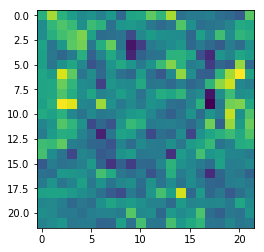

In [30]:
s = 'n02124075' # Egyptian cat synset ID
ids = synset_to_dfs_ids(s)
heatmap = out[0,ids].sum(axis=0)
plt.imshow(heatmap)

## Heatmap for Domestic cat (more general concept)

[285, 283, 282, 284, 281]


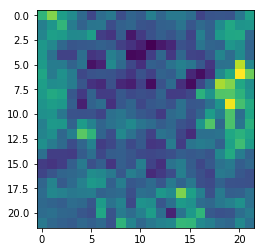

In [31]:
s = 'n02121808' # Egyptian cat synset ID
ids = synset_to_dfs_ids(s)
print(ids)
heatmap = out[0,ids].sum(axis=0)
plt.imshow(heatmap)

## Heatmap for Neckwear

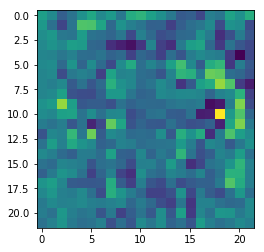

In [32]:
s = 'n03816005' # Neckwear synset ID
ids = synset_to_dfs_ids(s)
heatmap = out[0,ids].sum(axis=0)
plt.imshow(heatmap)

## Heatmap for Clothing

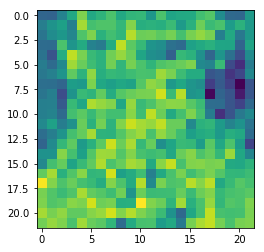

In [33]:
s = 'n03051540' # Suit synset ID
#s = "n02503517"
ids = synset_to_dfs_ids(s)
heatmap = out[0,ids].sum(axis=0)
plt.imshow(heatmap)